In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [3]:
# f = open('an-dao.json', encoding="utf8") 2/27-6/6/2022 createdate time

f = open('an-dao-2.json', encoding="utf8") 
#5/9 - 8/15/2022 createdate time

data = json.load(f)

## Read the data in json

In [4]:
# print(json.dumps(data, indent = 4, sort_keys=True))

In [5]:
def flatten_json(nested_json: dict, exclude: list=[''], sep: str='_') -> dict:
    """
    Flatten a list of nested dicts.
    """
    out = dict()
    def flatten(x: (list, dict, str), name: str='', exclude=exclude):
        if type(x) is dict:
            for a in x:
                if a not in exclude:
                    flatten(x[a], f'{name}{a}{sep}')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, f'{name}{i}{sep}')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out
#https://stackoverflow.com/questions/58442723/how-to-flatten-a-nested-json-recursively-with-flatten-json

In [6]:
# list to add dataframe from each file
df_list = list()

# # iterate through files
# for file in files:
#     with open(file, 'r', encoding='utf-8') as f:

#         # read with json
#         data = json.loads(f.read())

        # flatten_json into a dataframe and add to the dataframe list
df_list.append(pd.DataFrame.from_dict(flatten_json(data), orient='index').T)
        
# concat all dataframes together
df_ = pd.concat(df_list).reset_index(drop=True)

In [7]:
df_=df_.T
df_=df_.reset_index()
df_.columns =['field', 'value']
df_.head(15)

,field,value
0,data_organization_workspaceSections_0_id,a340fd5a-af7c-4526-ad43-018f5f59abe3
1,data_organization_workspaceSections_0_slug,dtech-guild
2,data_organization_workspaceSections_0_name,dTech Guild
3,data_organization_workspaceSections_0_createdAt,2022-03-18T16:29:01.423Z
4,data_organization_workspaceSections_1_id,eadc2630-1aaa-4734-88d4-f602fa4a7b9a
5,data_organization_workspaceSections_1_slug,operations-guild
6,data_organization_workspaceSections_1_name,Operations Guild
7,data_organization_workspaceSections_1_createdAt,2022-05-04T17:55:33.135Z
8,data_organization_workspaceSections_2_id,581f67b0-3279-4ac0-9276-28e9d615fcad
9,data_organization_workspaceSections_2_slug,test-office-hours


In [8]:
df_['type1'] = df_['field'].str.split('_').str[0]
df_['type2'] = df_['field'].str.split('_').str[1]
df_['type3'] = df_['field'].str.split('_').str[2]
df_['project_num'] = df_['field'].str.split('_').str[3]
df_['tasks'] = df_['field'].str.split('_').str[4]
df_['task_num'] = df_['field'].str.split('_').str[5]
df_['detail1'] = df_['field'].str.split('_').str[6]
df_['detail1_num'] = df_['field'].str.split('_').str[7]
df_['detail2'] = df_['field'].str.split('_').str[8]
df_['detail2_num'] = df_['field'].str.split('_').str[9]
df_['detail3'] = df_['field'].str.split('_').str[10]

df_ = df_[['type3', 'project_num', 'tasks', 'task_num', 'detail1', 'detail1_num', 'detail2', 'detail2_num', 'detail3', 'value']]
df_.head(50)

,type3,project_num,tasks,task_num,detail1,detail1_num,detail2,detail2_num,detail3,value
0,workspaceSections,0,id,NaN,NaN,NaN,NaN,NaN,NaN,a340fd5a-af7c-4526-ad43-018f5f59abe3
1,workspaceSections,0,slug,NaN,NaN,NaN,NaN,NaN,NaN,dtech-guild
2,workspaceSections,0,name,NaN,NaN,NaN,NaN,NaN,NaN,dTech Guild
3,workspaceSections,0,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-18T16:29:01.423Z
4,workspaceSections,1,id,NaN,NaN,NaN,NaN,NaN,NaN,eadc2630-1aaa-4734-88d4-f602fa4a7b9a
5,workspaceSections,1,slug,NaN,NaN,NaN,NaN,NaN,NaN,operations-guild
6,workspaceSections,1,name,NaN,NaN,NaN,NaN,NaN,NaN,Operations Guild
7,workspaceSections,1,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-04T17:55:33.135Z
8,workspaceSections,2,id,NaN,NaN,NaN,NaN,NaN,NaN,581f67b0-3279-4ac0-9276-28e9d615fcad
9,workspaceSections,2,slug,NaN,NaN,NaN,NaN,NaN,NaN,test-office-hours


In [9]:
# df.info()

In [10]:
# cond_1 = df['field'].str.contains("workspaces", case=False) == "True"
# cond_2 = df['field'].str.contains("workspaces", case=False) == "False"
# df['column_new'] = np.select([cond_1, cond_2], [df['field'].str[:28], df['field'].str[:26]], 'Other')


In [11]:
# def new_value(column_1):
#     print(column_1)
# #     if column_1.str.contains("workspaces", case=False) == "True":
#     if "workspaces" in column_1:
#         return column_1[:28]
#     else:
#         return column_1[:26]

# df['type'] = df.apply(lambda row: new_value(row.field), axis = 1)

In [12]:
print(len(df_))
df_.head()

11552


,type3,project_num,tasks,task_num,detail1,detail1_num,detail2,detail2_num,detail3,value
0,workspaceSections,0,id,NaN,NaN,NaN,NaN,NaN,NaN,a340fd5a-af7c-4526-ad43-018f5f59abe3
1,workspaceSections,0,slug,NaN,NaN,NaN,NaN,NaN,NaN,dtech-guild
2,workspaceSections,0,name,NaN,NaN,NaN,NaN,NaN,NaN,dTech Guild
3,workspaceSections,0,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-18T16:29:01.423Z
4,workspaceSections,1,id,NaN,NaN,NaN,NaN,NaN,NaN,eadc2630-1aaa-4734-88d4-f602fa4a7b9a


In [10]:
df_.to_csv('an-dao-2-parsed.csv')

### Remove Season 0 bounties as they were all tests before Aragon really started using DeWork

In [9]:
## seems the second file 'an-dao-2.json' no longer contais season 0 bounties so skip this step
# df= df_[~((df_['type3']=='projects')&(df_['project_num']=='0'))]
# print(len(df))
# df.head(20)

11552


,type3,project_num,tasks,task_num,detail1,detail1_num,detail2,detail2_num,detail3,value
0,workspaceSections,0,id,NaN,NaN,NaN,NaN,NaN,NaN,a340fd5a-af7c-4526-ad43-018f5f59abe3
1,workspaceSections,0,slug,NaN,NaN,NaN,NaN,NaN,NaN,dtech-guild
2,workspaceSections,0,name,NaN,NaN,NaN,NaN,NaN,NaN,dTech Guild
3,workspaceSections,0,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-18T16:29:01.423Z
4,workspaceSections,1,id,NaN,NaN,NaN,NaN,NaN,NaN,eadc2630-1aaa-4734-88d4-f602fa4a7b9a
5,workspaceSections,1,slug,NaN,NaN,NaN,NaN,NaN,NaN,operations-guild
6,workspaceSections,1,name,NaN,NaN,NaN,NaN,NaN,NaN,Operations Guild
7,workspaceSections,1,createdAt,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-04T17:55:33.135Z
8,workspaceSections,2,id,NaN,NaN,NaN,NaN,NaN,NaN,581f67b0-3279-4ac0-9276-28e9d615fcad
9,workspaceSections,2,slug,NaN,NaN,NaN,NaN,NaN,NaN,test-office-hours


In [13]:
# len(df_)-len(df)

In [15]:
df=df_

## Available data
Num of project
Num of tasks within a project
Name of tasks
Owner of tasks
Assinees for tasks (can be more than one)


### Participating Guilds

In [155]:
# first file results:
print(df[(df['type3']=='workspaces') & (df['tasks']=='name')].value.unique())

['dTech Guild' 'Operations Guild' 'People Guild']


In [16]:
# second file results:
print(df[(df['type3']=='workspaces') & (df['tasks']=='name')].value.unique())

['Ops Management Tasks' 'Growth Squad Tasks'
 "Operations Guild's Creator Gigs" 'dTech Open bounties' 'Finance Squad '
 'Community Experience Squad Open Bounties' 'dGov Task Management'
 'dGov Creator Management' 'TL;DR' 'Community Experience' 'dTech' 'Ops'
 'Growth' 'Legal' 'Finance' 'Data and Insights' 'Growth Squad']


### Number of Projects & Number of Tasks in a Project

In [156]:
# first file results:
numof_projects = len(df[(df['type3']=='projects')]['project_num'].unique())
print('Number of projects :',numof_projects)

Number of projects : 7


In [17]:
# second file results:
numof_projects = len(df[(df['type3']=='workspaces')]['project_num'].unique())
print('Number of projects :',numof_projects)

Number of projects : 19


In [158]:
# first file results:
done1 = df[(df['detail1']=='status') & (df['value']=='DONE')]

print('Number of completed tasks :',len(done1)) 

# not all completed projects have a doneAt timestamp
# done = df[(df['detail1']=='doneAt') & (df['value'].notnull())]
# len(done)


Number of completed tasks : 36


In [18]:
# second file results:
done1 = df[(df['detail1']=='status') & (df['value']=='DONE')]

print('Number of completed tasks :',len(done1)) 

Number of completed tasks : 170


In [159]:
# first file results:
# project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='owners')&(df['detail2']=='username')]['value']

print('Unique owners count:',len(df[(df['detail1']=='owners') & (df['detail2']=='username')].value.unique()))
print('Unique owners:',df[(df['detail1']=='owners') & (df['detail2']=='username')].value.unique())
print('')
print('Count of tasks per owners:',df[(df['detail1']=='owners') & (df['detail2']=='username')].value.value_counts())

Unique owners count: 14
Unique owners: ['Anukriti' 'lion917' 'luizfernando' 'Aclay' 'Joey C | Aragon.org - OOO'
 'shawnzywonzie' 'b3n1' 'Ivan | AN1' 'ricktik6' 'FMurphy' 'DeFiniTed'
 'Spectra CryptoVerse' 'Carla78' 'barukimang']

Count of tasks per owners: Anukriti                     29
lion917                      15
luizfernando                 11
Aclay                        10
DeFiniTed                    10
ricktik6                      6
shawnzywonzie                 3
b3n1                          2
FMurphy                       2
Carla78                       2
barukimang                    2
Joey C | Aragon.org - OOO     1
Ivan | AN1                    1
Spectra CryptoVerse           1
Name: value, dtype: int64


In [19]:
# second file results:

print('Unique owners count:',len(df[(df['detail1']=='owners') & (df['detail2']=='username')].value.unique()))
print('Unique owners:',df[(df['detail1']=='owners') & (df['detail2']=='username')].value.unique())
print('')
print('Count of tasks per owners:',df[(df['detail1']=='owners') & (df['detail2']=='username')].value.value_counts())

Unique owners count: 22
Unique owners: ['lion917' 'Anukriti' 'luizfernando' 'Aclay' 'Ivan | AN1'
 'Joey C | Aragon.org - OOO' 'b3nnn' 'shawnzywonzie' 'ricktik6' 'FMurphy'
 'Fabs' 'Spectra CryptoVerse' 'pato23.eth' 'harrywilson' 'DeFiniTed'
 'Anthony Leutenegger' 'Carla78' 'barukimang' 'aclay.eth' 'lee0007'
 'danielo' 'Brént']

Count of tasks per owners: lee0007                      64
Anukriti                     59
ricktik6                     35
lion917                      26
Aclay                        16
luizfernando                 11
aclay.eth                    10
DeFiniTed                    10
FMurphy                      10
shawnzywonzie                 9
Spectra CryptoVerse           5
b3nnn                         3
Carla78                       3
Ivan | AN1                    3
barukimang                    2
danielo                       2
Brént                         2
Fabs                          1
pato23.eth                    1
harrywilson                   1
Anth

### Uniqie Contributors

In [160]:
# first file results:

print('Unique assignees count:',len(df[(df['detail1']=='assignees') & (df['detail2']=='username')].value.unique()))
print('Unique assignees :',df[(df['detail1']=='assignees') & (df['detail2']=='username')].value.unique())
print('')
print('Count of tasks per assignee :',df[(df['detail1']=='assignees') & (df['detail2']=='username')].value.value_counts())

Unique assignees count: 22
Unique assignees : ['Anukriti' 'lion917' 'ricktik6' 'Elaheh' 'FMurphy' 'Aclay' 'chidi'
 'Igor MD' 'Openlake' 'callsense' 'Evgeniya4V' 'Baseballbatman'
 'Burber.Sergiy' 'supermaria' 'Romko' 'korzhon' 'DUMBRED' 'Azub' 'Fabs'
 'ifun' 'SoulGenesis' 'aakansha.eth']

Count of tasks per assignee : lion917           20
Anukriti          15
ricktik6          10
Aclay              3
Elaheh             2
FMurphy            2
Romko              1
SoulGenesis        1
ifun               1
Fabs               1
Azub               1
DUMBRED            1
korzhon            1
Baseballbatman     1
supermaria         1
Burber.Sergiy      1
Evgeniya4V         1
callsense          1
Openlake           1
Igor MD            1
chidi              1
aakansha.eth       1
Name: value, dtype: int64


In [20]:
# second file results:

print('Unique assignees count:',len(df[(df['detail1']=='assignees') & (df['detail2']=='username')].value.unique()))
print('Unique assignees :',df[(df['detail1']=='assignees') & (df['detail2']=='username')].value.unique())
print('')
print('Count of tasks per assignee :',df[(df['detail1']=='assignees') & (df['detail2']=='username')].value.value_counts())

Unique assignees count: 54
Unique assignees : ['lion917' 'Anukriti' 'shawnzywonzie' 'ricktik6' 'Elaheh' 'ifun' 'FMurphy'
 'Aclay' 'Teafeh💯' 'kirstin' 'chidi' 'Fabs' 'sumbo' 'sacred' 'IsraelRex'
 'MaxCaspar' 'grasshopper239' 'barukimang' 'BryanMutai' 'Openlake'
 'callsense' 'Evgeniya4V' 'Baseballbatman' 'Burber.Sergiy' 'supermaria'
 'Romko' 'korzhon' 'DUMBRED' 'Azub' 'DeFiniTed' 'jihad.eth' 'hirsh1'
 'Igor MD' 'SoulGenesis' 'aakansha.eth' 'remyMSG-23124' 'aclay.eth'
 'Hammad1412' 'mvor.eth' 'temitope' 'louisa' 'anson' 'Carla78' 'lee0007'
 'samkim' 'El' 'MikeAnanyin[MetaBelarus]' 'ZeptimusQ' 'Renzo D5'
 'Incandenza' 'Spectra CryptoVerse' 'blockchainlore' 'iamcraftyarl'
 'jugaadbhatia-18562']

Count of tasks per assignee : lion917                     36
Anukriti                    28
ricktik6                    26
Fabs                        14
anson                        9
FMurphy                      9
aclay.eth                    7
temitope                     6
kirstin               

In [161]:
# first file results:
print('Name of tasks :')
df[df['detail1']=='name'].value

Name of tasks :


141                 Onboard New Contributors to Ops Guild
168                                     EOM Report to ESD
188                              Discord Feedback Session
211                                  Notion Jam Session 3
234                             Create a TLDR for the DAO
254                       Design Reporting AN DAO System 
283                                 Post Ukraine Bounties
302            Talk to Julia and Sammie for Data Bounties
321                    Develop best practices with AN DAO
343                            Work with Rick: Reporting 
377                           Interview Bounty Applicants
405      Bounties posted on DeWork - Ops, Finance, Growth
426        Create a Template/Guidelines for a Guild Page 
449                    Merge Handbook Content with Notion
472       Make Who's Who Database Automatically Updatable
507               In-Depth Analysis of Notion Spreadsheet
530                   Centralise Meetings (Tactical Page)
558           

In [21]:
# second file results:
print('Name of tasks :')
df[df['detail1']=='name'].value

Name of tasks :


22                        Discord Office Hours 3
45                        Discord Office Hours 1
68                        Discord Office Hours 2
91                          Notion Jam Session 3
114                         Notion Jam Session 4
                          ...                   
11382                      Bot Clean Up Strategy
11403                               S1 Reporting
11431    S2 and S3 Proposal - Forum and Main DAO
11473                             TL;DR Proposal
11528          Create Tasks in DeWork for Growth
Name: value, Length: 226, dtype: object

In [162]:
# first file results:
print('Reward amounts :')
df[(df['detail1']=='rewards') & (df['detail2']=='amount')]
# df.loc[(df['detail1']=='rewards') & (df['detail2']=='amount')].value -- just the amount

Reward amounts :


,type3,project_num,tasks,task_num,detail1,detail1_num,detail2,detail2_num,detail3,value
897,projects,3,tasks,0,rewards,0,amount,NaN,NaN,300000000
943,projects,3,tasks,1,rewards,0,amount,NaN,NaN,300000000
966,projects,3,tasks,2,rewards,0,amount,NaN,NaN,300000000
989,projects,3,tasks,3,rewards,0,amount,NaN,NaN,300000000
1010,projects,3,tasks,4,rewards,0,amount,NaN,NaN,400000000
1097,projects,3,tasks,5,rewards,0,amount,NaN,NaN,400000000
1152,projects,3,tasks,6,rewards,0,amount,NaN,NaN,200000000
1265,projects,3,tasks,7,rewards,0,amount,NaN,NaN,200000000
1367,projects,3,tasks,8,rewards,0,amount,NaN,NaN,200000000
1513,projects,3,tasks,9,rewards,0,amount,NaN,NaN,200000000


In [22]:
# second file results:
print('Reward amounts :')
df[(df['detail1']=='rewards') & (df['detail2']=='amount')]
# df.loc[(df['detail1']=='rewards') & (df['detail2']=='amount')].value -- just the amount

Reward amounts :


,type3,project_num,tasks,task_num,detail1,detail1_num,detail2,detail2_num,detail3,value
1129,workspaces,1,tasks,0,rewards,0,amount,NaN,NaN,80000000
1137,workspaces,1,tasks,0,rewards,1,amount,NaN,NaN,720000000
1166,workspaces,1,tasks,1,rewards,0,amount,NaN,NaN,15000000
1174,workspaces,1,tasks,1,rewards,1,amount,NaN,NaN,135000000
1204,workspaces,1,tasks,2,rewards,0,amount,NaN,NaN,720000000
...,...,...,...,...,...,...,...,...,...,...
10858,workspaces,9,tasks,61,rewards,0,amount,NaN,NaN,37500000
10878,workspaces,9,tasks,61,rewards,1,amount,NaN,NaN,337500000
10921,workspaces,9,tasks,62,rewards,0,amount,NaN,NaN,450000000
10981,workspaces,9,tasks,63,rewards,0,amount,NaN,NaN,450000000


In [163]:
# first file results:
df.loc[(df['type3']=='projects') & (df['project_num']=='3') &
       (df['detail1']=='rewards') & (df['detail2']=='amount')].value.astype('int').sum()/1000000

7360.0

In [164]:
# first file results:
df.loc[(df['type3']=='projects') & (df['project_num']=='4') &
       (df['detail1']=='rewards') & (df['detail2']=='amount')].value.astype('int').sum()/1000000

1200.0

In [165]:
# first file results:
df.loc[(df['type3']=='projects') & (df['project_num']=='5') &
       (df['detail1']=='rewards') & (df['detail2']=='amount')].value.astype('int').sum()/1000000

1100.0

### Projects/Tasks Statues, Assignees (Contributors), Rewards, etc.

In [167]:
# first file results:
numof_projects = len(df[(df['type3']=='projects')]['project_num'].unique())
print('numof_projects:', numof_projects)


for j in range(numof_projects):
    print('')
    print('project_num :', j)
    print('project_name :',df[(df['type3']=='projects')&(df['project_num']==str(j+1))&(df['tasks']=='name')]['value'].values[0])
    print('number of tasks in project :',len(df[(df['type3']=='projects')&(df['project_num']==str(j))&(df['tasks']=='tasks')]['task_num'].unique()))
#     print('    task status :', project[(project['tasks']=='tasks')&(df['task_num']==str(j))&(df['detail1']=='status')]['value'])
    project = df[(df['type3']=='projects')&(df['project_num']==str(j))]
    numof_project_tasks = len(project[(project['tasks']=='tasks')]['task_num'].unique())

        
print('')

numof_projects: 7

project_num : 0
project_name : Ops Management Tasks
number of tasks in project : 0

project_num : 1
project_name : Growth Squad Tasks
number of tasks in project : 28

project_num : 2
project_name : Operations Guild's Bounties
number of tasks in project : 1

project_num : 3
project_name : dTech Open bounties
number of tasks in project : 19

project_num : 4
project_name : Finance Squad Bounties
number of tasks in project : 2

project_num : 5
project_name : Office Hours Test
number of tasks in project : 10

project_num : 6
project_name : Community Experience Squad Open Bounties
number of tasks in project : 0



In [27]:
# second file results:
numof_projects = len(df[(df['type3']=='workspaces')]['project_num'].unique())
print('numof_projects:', numof_projects)


for j in range(numof_projects):
    print('')
    print('project_num :', j)
    print('project_name :',df[(df['type3']=='workspaces')&(df['project_num']==str(j))&(df['tasks']=='name')]['value'].values[0])
    print('number of tasks in project :',len(df[(df['type3']=='workspaces')&(df['project_num']==str(j))&(df['tasks']=='tasks')]['task_num'].unique()))
#     print('    task status :', project[(project['tasks']=='tasks')&(df['task_num']==str(j))&(df['detail1']=='status')]['value'])
    project = df[(df['type3']=='workspaces')&(df['project_num']==str(j))]
    numof_project_tasks = len(project[(project['tasks']=='tasks')]['task_num'].unique())

        
print('')

numof_projects: 19

project_num : 0
project_name : Ops Management Tasks
number of tasks in project : 43

project_num : 1
project_name : Growth Squad Tasks
number of tasks in project : 10

project_num : 2
project_name : Operations Guild's Creator Gigs
number of tasks in project : 49

project_num : 3
project_name : dTech Open bounties
number of tasks in project : 5

project_num : 4
project_name : Finance Squad 
number of tasks in project : 30

project_num : 5
project_name : Community Experience Squad Open Bounties
number of tasks in project : 8

project_num : 6
project_name : dGov Task Management
number of tasks in project : 0

project_num : 7
project_name : dGov Task Management
number of tasks in project : 0

project_num : 8
project_name : dGov Task Management
number of tasks in project : 0

project_num : 9
project_name : dGov Creator Management
number of tasks in project : 64

project_num : 10
project_name : TL;DR
number of tasks in project : 8

project_num : 11
project_name : Communit

In [168]:
# first file results:

numof_projects = len(df[(df['type3']=='projects')]['project_num'].unique())
print('numof_projects:', numof_projects)
time_to_completion = []

for j in range(numof_projects):
    print('')
    print('project_num :', j)
    print('project_name :',df[(df['type3']=='projects')&(df['project_num']==str(j+1))&(df['tasks']=='name')]['value'].values[0])
    print('number of tasks in project :',len(df[(df['type3']=='projects')&(df['project_num']==str(j))&(df['tasks']=='tasks')]['task_num'].unique()))

    project = df[(df['type3']=='projects')&(df['project_num']==str(j))]
    numof_project_tasks = len(project[(project['tasks']=='tasks')]['task_num'].unique())
    
    done_status = []


    for i in range(numof_project_tasks):
        print('')
        print('    task number :', i)
        print('    task name :', project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='name')]['value'].values[0])
        task_status = project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='status')]['value'].values[0]
        print('    task status :', task_status)
        if task_status == "DONE":
            done_status.append(task_status)
        start = pd.to_datetime(project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='createdAt')]['value'].values[0])
        end = pd.to_datetime(project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='doneAt')]['value'].values[0])        
        print('    task created time :', start)
        print('    task done time :', end)
        if end is not None:
            completion = end - start
            time_to_completion.append(completion.days)
            print('    time to completion:', completion)
        else:
            print ('    time to completion not defined')
        if not project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='owners')&(df['detail2']=='username')]['value'].empty:
            print('    task owner :', project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='owners')&(df['detail2']=='username')]['value'].values[0])
        else:
            print ('    task owner not defined')

        multiple_assignees = project[(project['tasks']=='tasks')&(df['task_num']==str(i))
                             &(df['detail1']=='assignees')]['detail1_num'].unique()

        if not project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='assignees')&(df['detail2']=='username')]['value'].empty:
            assignees_list = []
            for k in multiple_assignees:
                assignees = project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='assignees')
                              &(df['detail1_num']==str(k))&(df['detail2']=='username')]['value'].values[0]
                assignees_list.append(assignees)
            print('    task assignees :', assignees_list)
        else:
            print ('    task assignees not defined')
                  
        if not project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='rewards')&(df['detail2']=='amount')]['value'].empty:
            print('    task rewards :', int(project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='rewards')&(df['detail2']=='amount')]['value'].values[0])/1000000)
        else:
            print ('    task rewards not defined')             
            
    print('')
    print('number of DONE tasks in project :',len(done_status))
        
print('')

numof_projects: 7

project_num : 0
project_name : Ops Management Tasks
number of tasks in project : 0

number of DONE tasks in project : 0

project_num : 1
project_name : Growth Squad Tasks
number of tasks in project : 28

    task number : 0
    task name : Onboard New Contributors to Ops Guild
    task status : TODO
    task created time : 2022-06-01 02:02:43.268000+00:00
    task done time : None
    time to completion not defined
    task owner : Anukriti
    task assignees : ['Anukriti', 'lion917']
    task rewards not defined

    task number : 1
    task name : EOM Report to ESD
    task status : TODO
    task created time : 2022-06-01 02:01:49.519000+00:00
    task done time : None
    time to completion not defined
    task owner : Anukriti
    task assignees : ['Anukriti']
    task rewards not defined

    task number : 2
    task name : Discord Feedback Session
    task status : DONE
    task created time : 2022-05-31 08:53:49.048000+00:00
    task done time : 2022-05-31 08:

    task owner : Anukriti
    task assignees : ['FMurphy']
    task rewards not defined

    task number : 25
    task name : Bounty Information - Finance and Treasury
    task status : DONE
    task created time : 2022-05-09 22:09:35.790000+00:00
    task done time : 2022-05-16 15:35:40.732000+00:00
    time to completion: 6 days 17:26:04.942000
    task owner : Anukriti
    task assignees : ['Aclay', 'ricktik6']
    task rewards not defined

    task number : 26
    task name : Bounty Board Submission Form
    task status : DONE
    task created time : 2022-05-09 22:08:44.834000+00:00
    task done time : 2022-05-14 22:55:50.676000+00:00
    time to completion: 5 days 00:47:05.842000
    task owner : Anukriti
    task assignees : ['Anukriti', 'lion917']
    task rewards not defined

    task number : 27
    task name : Bounty Board Management - Notion
    task status : DONE
    task created time : 2022-05-09 22:03:01.211000+00:00
    task done time : 2022-05-17 17:37:16.919000+00:00


    task created time : 2022-05-17 16:01:31.397000+00:00
    task done time : None
    time to completion not defined
    task owner : Carla78
    task assignees : ['SoulGenesis']
    task rewards : 600.0

    task number : 1
    task name : Community review Tech Doc. III Part Dev. (CLI) 1/2 (DTG.P2.M5.N2)
    task status : IN_PROGRESS
    task created time : 2022-05-17 16:00:35.192000+00:00
    task done time : None
    time to completion not defined
    task owner : Carla78
    task assignees : ['aakansha.eth']
    task rewards : 600.0

number of DONE tasks in project : 0

project_num : 5
project_name : Office Hours Test
number of tasks in project : 10

    task number : 0
    task name : 10% ANT split
    task status : DONE
    task created time : 2022-05-27 10:47:54.974000+00:00
    task done time : 2022-05-27 10:48:59.033000+00:00
    time to completion: 0 days 00:01:04.059000
    task owner : ricktik6
    task assignees : ['ricktik6']
    task rewards : 10.0

    task number : 1


In [28]:
# second file results:

numof_projects = len(df[(df['type3']=='workspaces')]['project_num'].unique())
print('numof_projects:', numof_projects)
time_to_completion = []

for j in range(numof_projects):
    print('')
    print('project_num :', j)
    print('project_name :',df[(df['type3']=='workspaces')&(df['project_num']==str(j))&(df['tasks']=='name')]['value'].values[0])
    print('number of tasks in project :',len(df[(df['type3']=='workspaces')&(df['project_num']==str(j))&(df['tasks']=='tasks')]['task_num'].unique()))

    project = df[(df['type3']=='workspaces')&(df['project_num']==str(j))]
    numof_project_tasks = len(project[(project['tasks']=='tasks')]['task_num'].unique())
    
    done_status = []


    for i in range(numof_project_tasks):
        print('')
        print('    task number :', i)
        print('    task name :', project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='name')]['value'].values[0])
        task_status = project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='status')]['value'].values[0]
        print('    task status :', task_status)
        if task_status == "DONE":
            done_status.append(task_status)
        start = pd.to_datetime(project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='createdAt')]['value'].values[0])
        end = pd.to_datetime(project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='doneAt')]['value'].values[0])        
        print('    task created time :', start)
        print('    task done time :', end)
        if end is not None:
            completion = end - start
            time_to_completion.append(completion.days)
            print('    time to completion:', completion)
        else:
            print ('    time to completion not defined')
        if not project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='owners')&(df['detail2']=='username')]['value'].empty:
            print('    task owner :', project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='owners')&(df['detail2']=='username')]['value'].values[0])
        else:
            print ('    task owner not defined')

        multiple_assignees = project[(project['tasks']=='tasks')&(df['task_num']==str(i))
                             &(df['detail1']=='assignees')]['detail1_num'].unique()

        if not project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='assignees')&(df['detail2']=='username')]['value'].empty:
            assignees_list = []
            for k in multiple_assignees:
                assignees = project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='assignees')
                              &(df['detail1_num']==str(k))&(df['detail2']=='username')]['value'].values[0]
                assignees_list.append(assignees)
            print('    task assignees :', assignees_list)
        else:
            print ('    task assignees not defined')
                  
        if not project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='rewards')&(df['detail2']=='amount')]['value'].empty:
            print('    task rewards :', int(project[(project['tasks']=='tasks')&(df['task_num']==str(i))&(df['detail1']=='rewards')&(df['detail2']=='amount')]['value'].values[0])/1000000)
        else:
            print ('    task rewards not defined')             
            
    print('')
    print('number of DONE tasks in project :',len(done_status))
        
print('')

numof_projects: 19

project_num : 0
project_name : Ops Management Tasks
number of tasks in project : 43

    task number : 0
    task name : Discord Office Hours 3
    task status : DONE
    task created time : 2022-08-07 23:21:39.528000+00:00
    task done time : 2022-08-07 23:21:39.481000+00:00
    time to completion: -1 days +23:59:59.953000
    task owner : lion917
    task assignees : ['lion917']
    task rewards not defined

    task number : 1
    task name : Discord Office Hours 1
    task status : DONE
    task created time : 2022-08-07 23:21:12.736000+00:00
    task done time : 2022-08-07 23:21:12.691000+00:00
    time to completion: -1 days +23:59:59.955000
    task owner : lion917
    task assignees : ['lion917']
    task rewards not defined

    task number : 2
    task name : Discord Office Hours 2
    task status : DONE
    task created time : 2022-08-07 23:21:08.581000+00:00
    task done time : 2022-08-07 23:21:08.514000+00:00
    time to completion: -1 days +23:59:59.

    task owner : lion917
    task assignees : ['Anukriti', 'ricktik6', 'lion917']
    task rewards not defined

    task number : 25
    task name : Interview Bounty Applicants
    task status : DONE
    task created time : 2022-05-17 17:42:53.888000+00:00
    task done time : 2022-05-26 00:52:48.127000+00:00
    time to completion: 8 days 07:09:54.239000
    task owner : lion917
    task assignees : ['Anukriti', 'lion917']
    task rewards not defined

    task number : 26
    task name : Bounties posted on DeWork - Ops, Finance, Growth
    task status : DONE
    task created time : 2022-05-14 18:40:49.206000+00:00
    task done time : 2022-05-16 17:59:19.016000+00:00
    time to completion: 1 days 23:18:29.810000
    task owner : Aclay
    task assignees : ['Anukriti']
    task rewards not defined

    task number : 27
    task name : Create a Template/Guidelines for a Guild Page 
    task status : DONE
    task created time : 2022-05-11 17:51:07.571000+00:00
    task done time : 202

    task owner : FMurphy
    task assignees : ['Fabs']
    task rewards : 225.0

    task number : 6
    task name : 3-part 'Ultimate DAO Tooling Guide' blog series
    task status : COMMUNITY_SUGGESTIONS
    task created time : 2022-07-16 17:58:18.148000+00:00
    task done time : None
    time to completion not defined
    task owner not defined
    task assignees not defined
    task rewards not defined

    task number : 7
    task name : ANT
    task status : DONE
    task created time : 2022-07-01 13:00:53.512000+00:00
    task done time : 2022-07-01 13:01:36.992000+00:00
    time to completion: 0 days 00:00:43.480000
    task owner : FMurphy
    task assignees : ['kirstin']
    task rewards : 40.0

    task number : 8
    task name : Content Bounty
    task status : DONE
    task created time : 2022-07-01 13:00:52.956000+00:00
    task done time : 2022-07-01 13:44:52.197000+00:00
    time to completion: 0 days 00:43:59.241000
    task owner : FMurphy
    task assignees : ['kirst

    task created time : 2022-06-14 09:52:13.230000+00:00
    task done time : 2022-06-14 09:52:41.303000+00:00
    time to completion: 0 days 00:00:28.073000
    task owner : ricktik6
    task assignees : ['Burber.Sergiy']
    task rewards : 20.0

    task number : 22
    task name : ANT
    task status : DONE
    task created time : 2022-06-14 09:50:30.757000+00:00
    task done time : 2022-06-14 09:51:30.342000+00:00
    time to completion: 0 days 00:00:59.585000
    task owner : ricktik6
    task assignees : ['supermaria']
    task rewards : 20.0

    task number : 23
    task name : ANT
    task status : DONE
    task created time : 2022-06-14 09:49:02.470000+00:00
    task done time : 2022-06-14 09:49:33.520000+00:00
    time to completion: 0 days 00:00:31.050000
    task owner : ricktik6
    task assignees : ['Romko']
    task rewards : 20.0

    task number : 24
    task name : ANT
    task status : DONE
    task created time : 2022-06-14 09:47:28.820000+00:00
    task done time

    task assignees : ['Azub']
    task rewards : 180.0

    task number : 46
    task name : Metrics and Insights Contributor
    task status : IN_REVIEW
    task created time : 2022-05-17 21:16:10.948000+00:00
    task done time : None
    time to completion not defined
    task owner : Anukriti
    task assignees : ['Fabs']
    task rewards : 2000.0

    task number : 47
    task name : DAO Tooler
    task status : IN_REVIEW
    task created time : 2022-05-14 19:21:48.264000+00:00
    task done time : None
    time to completion not defined
    task owner : Anukriti
    task assignees : ['ifun']
    task rewards : 1000.0

    task number : 48
    task name : DAO Cartographer
    task status : IN_REVIEW
    task created time : 2022-05-14 19:02:59.135000+00:00
    task done time : None
    time to completion not defined
    task owner : lion917
    task assignees : ['Elaheh']
    task rewards : 360.0

number of DONE tasks in project : 40

project_num : 3
project_name : dTech Open bount

    task assignees : ['ricktik6']
    task rewards : 900.0

    task number : 17
    task name : ANT split
    task status : DONE
    task created time : 2022-06-29 20:05:22.075000+00:00
    task done time : 2022-06-29 20:05:21.942000+00:00
    time to completion: -1 days +23:59:59.867000
    task owner : ricktik6
    task assignees : ['aclay.eth']
    task rewards : 50.0

    task number : 18
    task name : June: Providing advise / guidance within the Finance Squad
    task status : DONE
    task created time : 2022-06-29 20:05:20.865000+00:00
    task done time : 2022-06-30 09:45:01.945000+00:00
    time to completion: 0 days 13:39:41.080000
    task owner : ricktik6
    task assignees : ['aclay.eth']
    task rewards : 450.0

    task number : 19
    task name : ANT
    task status : DONE
    task created time : 2022-06-16 09:13:09.409000+00:00
    task done time : 2022-06-16 09:13:55.911000+00:00
    time to completion: 0 days 00:00:46.502000
    task owner : ricktik6
    task ass

    task name : AUG TAO Voting Documentation 1/2
    task status : IN_PROGRESS
    task created time : 2022-08-10 23:59:19.338000+00:00
    task done time : None
    time to completion not defined
    task owner : lee0007
    task assignees : ['Carla78']
    task rewards : 25.0

    task number : 3
    task name : dGov S1 Twitter Review
    task status : TODO
    task created time : 2022-08-09 01:50:28.507000+00:00
    task done time : None
    time to completion not defined
    task owner : lee0007
    task assignees : ['lee0007']
    task rewards : 108.0

    task number : 4
    task name : JULY Governance Analysts -Performance 2/2
    task status : DONE
    task created time : 2022-07-27 21:08:09.785000+00:00
    task done time : 2022-07-27 21:22:12.189000+00:00
    time to completion: 0 days 00:14:02.404000
    task owner : lee0007
    task assignees : ['samkim']
    task rewards : 63.0

    task number : 5
    task name : JULY Governance Analysts - Baselines 2/2
    task status : 

    task created time : 2022-06-29 23:19:25.853000+00:00
    task done time : 2022-06-29 23:19:25.810000+00:00
    time to completion: -1 days +23:59:59.957000
    task owner : lee0007
    task assignees : ['ricktik6']
    task rewards : 100.0

    task number : 28
    task name : June dTech Core Support (Copy)
    task status : DONE
    task created time : 2022-06-29 23:18:42.949000+00:00
    task done time : 2022-06-29 23:18:42.906000+00:00
    time to completion: -1 days +23:59:59.957000
    task owner : lee0007
    task assignees : ['anson']
    task rewards : 125.0

    task number : 29
    task name : June  Growth Coordination (Copy)
    task status : DONE
    task created time : 2022-06-29 23:17:59.816000+00:00
    task done time : 2022-06-29 23:17:59.771000+00:00
    time to completion: -1 days +23:59:59.955000
    task owner : lee0007
    task assignees : ['FMurphy']
    task rewards : 37.5

    task number : 30
    task name : June Governance Secretary (Copy)
    task status 

    task name : JULY AMA
    task status : DONE
    task created time : 2022-06-27 06:16:28.709000+00:00
    task done time : 2022-07-27 08:36:00.997000+00:00
    time to completion: 30 days 02:19:32.288000
    task owner : lee0007
    task assignees : ['temitope']
    task rewards : 112.5

    task number : 53
    task name : June  Growth Coordination
    task status : DONE
    task created time : 2022-06-25 23:47:37.590000+00:00
    task done time : 2022-06-28 23:48:06.067000+00:00
    time to completion: 3 days 00:00:28.477000
    task owner : lee0007
    task assignees : ['FMurphy']
    task rewards : 337.5

    task number : 54
    task name : June Governance Secretary
    task status : DONE
    task created time : 2022-06-21 08:10:22.745000+00:00
    task done time : 2022-06-25 23:44:12.114000+00:00
    time to completion: 4 days 15:33:49.369000
    task owner : lee0007
    task assignees : ['blockchainlore']
    task rewards : 1125.0

    task number : 55
    task name : AUG S2 

    task status : TODO
    task created time : 2022-07-24 21:26:23.543000+00:00
    task done time : None
    time to completion not defined
    task owner : aclay.eth
    task assignees : ['lion917', 'Anukriti']
    task rewards not defined

    task number : 3
    task name : S2 and S3 Proposal - Forum and Main DAO
    task status : TODO
    task created time : 2022-07-24 21:24:49.074000+00:00
    task done time : None
    time to completion not defined
    task owner : aclay.eth
    task assignees : ['Fabs', 'Anukriti', 'lion917', 'ricktik6']
    task rewards not defined

    task number : 4
    task name : TL;DR Proposal
    task status : TODO
    task created time : 2022-07-24 21:24:11.939000+00:00
    task done time : None
    time to completion not defined
    task owner : Brént
    task assignees : ['Anukriti']
    task rewards not defined

number of DONE tasks in project : 0

project_num : 14
project_name : Growth
number of tasks in project : 0

number of DONE tasks in project

In [169]:
# first file results:
print(time_to_completion)
time_to_completion_ = [int(0) if item == int(-1) else item for item in time_to_completion]
print(time_to_completion_)


[0, -1, 6, 6, 6, 0, 8, 8, 1, 19, 5, 16, 7, 21, 6, 6, 5, 7, 9, 9, 10, 7, 9, 9, 9, 10, 7, 9, 0, 0, 0, 2, 1, 2]
[0, 0, 6, 6, 6, 0, 8, 8, 1, 19, 5, 16, 7, 21, 6, 6, 5, 7, 9, 9, 10, 7, 9, 9, 9, 10, 7, 9, 0, 0, 0, 2, 1, 2]


In [29]:
# second file results:
print(time_to_completion)
time_to_completion_ = [int(0) if item == int(-1) else item for item in time_to_completion]
print(time_to_completion_)


[-1, -1, -1, -1, -1, 37, 37, 0, 37, -1, -1, 37, 54, 67, 13, 0, -1, 6, 6, 6, 0, 8, 8, 1, 50, 88, 88, 88, 19, 5, 16, 7, 21, 6, 6, 5, 7, -1, 13, 24, 5, 24, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 11, 15, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 14, 51, 36, 9, 9, 10, 7, 9, 9, 9, 10, 7, 24, 0, 0, 29, 37, 37, 0, 0, 0, 14, 28, 28, 0, 0, 0, 0, -1, 0, 0, -1, -1, 35, 21, 35, 0, 2, 1, 2, -1, -1, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 29, 1, 1, 1, 1, 1, 30, 1, 2, 30, 35, 0, 2, 30, 30, 3, 4, 50, 0, 37, 37, 37, 8]
[0, 0, 0, 0, 0, 37, 37, 0, 37, 0, 0, 37, 54, 67, 13, 0, 0, 6, 6, 6, 0, 8, 8, 1, 50, 88, 88, 88, 19, 5, 16, 7, 21, 6, 6, 5, 7, 0, 13, 24, 5, 24, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 11, 15, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 14, 51, 36, 9, 9, 10, 7, 9, 9, 9, 10, 7, 24, 0, 0, 29, 37, 37, 0, 0, 0, 14, 28, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 35, 21, 35, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [170]:
# first file results:
df_complete = pd.DataFrame (time_to_completion_, columns = ['time_to_completion'])

In [30]:
# second file results:
df_complete = pd.DataFrame (time_to_completion_, columns = ['time_to_completion'])

In [171]:
# first file results:
print('average time_to_completion:', df_complete.mean())
print('min time_to_completion:', df_complete.min())
print('max time_to_completion:', df_complete.max())

average time_to_completion: time_to_completion    6.470588
dtype: float64
min time_to_completion: time_to_completion    0
dtype: int64
max time_to_completion: time_to_completion    21
dtype: int64


In [31]:
# second file results:
print('average time_to_completion:', df_complete.mean())
print('min time_to_completion:', df_complete.min())
print('max time_to_completion:', df_complete.max())

average time_to_completion: time_to_completion    10.02381
dtype: float64
min time_to_completion: time_to_completion    0
dtype: int64
max time_to_completion: time_to_completion    88
dtype: int64


In [34]:
import matplotlib.pyplot as plt
import numpy as np

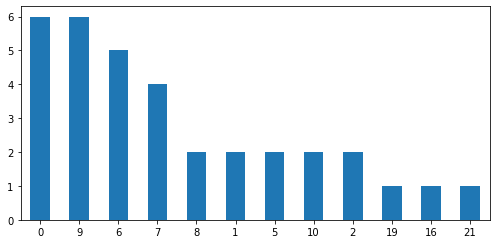

In [173]:
# first file results:
df_complete['time_to_completion'].value_counts().plot(kind='bar', rot=0)

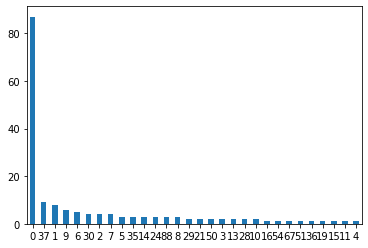

In [32]:
# second file results:
df_complete['time_to_completion'].value_counts().plot(kind='bar', rot=0)

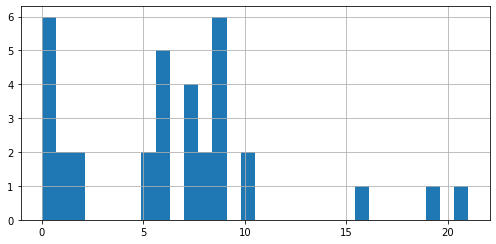

In [174]:
# first file results:
df_complete['time_to_completion'].hist(bins=30)
plt.show()

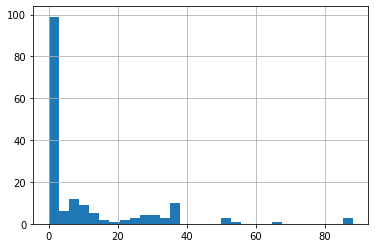

In [35]:
# second file results:
df_complete['time_to_completion'].hist(bins=30)
plt.show()